In [2]:
import pandas as pd 
import pickle

In [3]:
df=pd.read_csv('IPL.csv')

In [5]:
df.head(5)

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,4/18/2008,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,4/18/2008,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,4/18/2008,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,4/18/2008,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,4/18/2008,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222


In [6]:
df.shape

(76014, 15)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76014 entries, 0 to 76013
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   mid             76014 non-null  int64  
 1   date            76014 non-null  object 
 2   venue           76014 non-null  object 
 3   bat_team        76014 non-null  object 
 4   bowl_team       76014 non-null  object 
 5   batsman         76014 non-null  object 
 6   bowler          76014 non-null  object 
 7   runs            76014 non-null  int64  
 8   wickets         76014 non-null  int64  
 9   overs           76014 non-null  float64
 10  runs_last_5     76014 non-null  int64  
 11  wickets_last_5  76014 non-null  int64  
 12  striker         76014 non-null  int64  
 13  non-striker     76014 non-null  int64  
 14  total           76014 non-null  int64  
dtypes: float64(1), int64(8), object(6)
memory usage: 8.7+ MB


In [8]:
df.isnull().sum()

mid               0
date              0
venue             0
bat_team          0
bowl_team         0
batsman           0
bowler            0
runs              0
wickets           0
overs             0
runs_last_5       0
wickets_last_5    0
striker           0
non-striker       0
total             0
dtype: int64

In [9]:
df.describe()


,mid,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
count,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000
mean,308.627740,74.889349,2.415844,9.783068,33.216434,1.120307,24.962283,8.869287,160.901452
std,178.156878,48.823327,2.015207,5.772587,14.914174,1.053343,20.079752,10.795742,29.246231
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67.000000
25%,154.000000,34.000000,1.000000,4.600000,24.000000,0.000000,10.000000,1.000000,142.000000
50%,308.000000,70.000000,2.000000,9.600000,34.000000,1.000000,20.000000,5.000000,162.000000
75%,463.000000,111.000000,4.000000,14.600000,43.000000,2.000000,35.000000,13.000000,181.000000
max,617.000000,263.000000,10.000000,19.600000,113.000000,7.000000,175.000000,109.000000,263.000000


<AxesSubplot:>

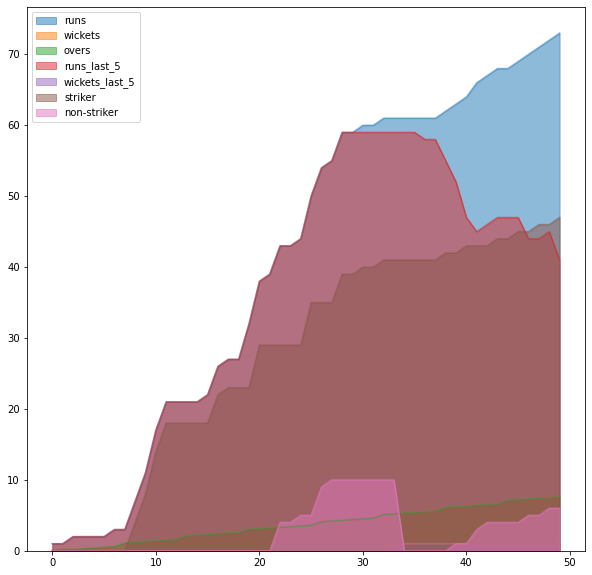

In [10]:
df[['date','venue','bat_team','bowl_team','batsman','bowler','runs',
   'wickets','overs','runs_last_5','wickets_last_5','striker',
   'non-striker']][:50].plot(kind='area', figsize = (10,10), stacked=False)

In [11]:
#Removing unwanted columns - reduce memory size
cols_to_remove=['mid','venue','batsman','bowler','striker','non-striker']
df.drop(labels=cols_to_remove, axis=1, inplace=True)

In [12]:
#cross check
df.head(5)

,date,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
0,4/18/2008,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.1,1,0,222
1,4/18/2008,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.2,1,0,222
2,4/18/2008,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.2,2,0,222
3,4/18/2008,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.3,2,0,222
4,4/18/2008,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.4,2,0,222


In [13]:
#Checking how many batting teams are there
df['bat_team'].unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Deccan Chargers', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Delhi Daredevils',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant'], dtype=object)

In [14]:
#only keep current teams which are present
consistent_team=['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals', 'Mumbai Indians',
                'Kings XI Punjab', 'Royal Challengers Banglore', 'Delhi Daredevils', 'Sunrisers Hyderabad']

In [15]:
#Filtering based on consistency
df=df[(df['bat_team'].isin(consistent_team)) & (df['bowl_team'].isin(consistent_team))]

In [16]:
#Printing out unique team after filtering
print(df['bat_team'].unique())
print(df['bowl_team'].unique())

['Chennai Super Kings' 'Rajasthan Royals' 'Kings XI Punjab'
 'Kolkata Knight Riders' 'Delhi Daredevils' 'Mumbai Indians'
 'Sunrisers Hyderabad']
['Kings XI Punjab' 'Delhi Daredevils' 'Rajasthan Royals' 'Mumbai Indians'
 'Chennai Super Kings' 'Kolkata Knight Riders' 'Sunrisers Hyderabad']


In [17]:
#Filtering based on 5 overs
df=df[df['overs']>=5.0]
df.head()

,date,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
156,4/19/2008,Chennai Super Kings,Kings XI Punjab,46,1,5.1,45,1,240
157,4/19/2008,Chennai Super Kings,Kings XI Punjab,52,1,5.2,51,1,240
158,4/19/2008,Chennai Super Kings,Kings XI Punjab,52,1,5.3,47,1,240
159,4/19/2008,Chennai Super Kings,Kings XI Punjab,53,1,5.4,48,1,240
160,4/19/2008,Chennai Super Kings,Kings XI Punjab,53,1,5.5,44,1,240


In [20]:
#Converting date cols from string to date time object
from datetime import datetime
df['date']=df['date'].apply(lambda x: datetime.strptime(x, '%m/%d/%Y'))

In [21]:
df['date'].dtype

dtype('<M8[ns]')

In [22]:
#For numerical Values
cat_df=pd.get_dummies(data=df, columns=['bat_team', 'bowl_team'])

In [23]:
cat_df.head(2)

,date,runs,wickets,overs,runs_last_5,wickets_last_5,total,bat_team_Chennai Super Kings,bat_team_Delhi Daredevils,bat_team_Kings XI Punjab,...,bat_team_Mumbai Indians,bat_team_Rajasthan Royals,bat_team_Sunrisers Hyderabad,bowl_team_Chennai Super Kings,bowl_team_Delhi Daredevils,bowl_team_Kings XI Punjab,bowl_team_Kolkata Knight Riders,bowl_team_Mumbai Indians,bowl_team_Rajasthan Royals,bowl_team_Sunrisers Hyderabad
156,2008-04-19,46,1,5.1,45,1,240,1,0,0,...,0,0,0,0,0,1,0,0,0,0
157,2008-04-19,52,1,5.2,51,1,240,1,0,0,...,0,0,0,0,0,1,0,0,0,0


In [34]:
#Splitting dataset into train and test
X_train=cat_df.drop(labels='total', axis=1)[cat_df['date'].dt.year<=2016]
X_test=cat_df.drop(labels='total', axis=1)[cat_df['date'].dt.year>=2017]

In [35]:
#Since only one column so considered as series
y_train=cat_df[cat_df['date'].dt.year<=2016]['total'].values
y_test=cat_df[cat_df['date'].dt.year>=2017]['total'].values

In [36]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(27275, 20) (27275,)
(1947, 20) (1947,)


In [37]:
#Since requirement of date col is over, we can drop it
X_train.drop(labels='date', axis=True, inplace=True)
X_test.drop(labels='date', axis=True, inplace=True)


In [38]:
#use display to cross check in single line
display("X_train", X_train.head(1))
display("X_test", X_test.head(1))

'X_train'

,runs,wickets,overs,runs_last_5,wickets_last_5,bat_team_Chennai Super Kings,bat_team_Delhi Daredevils,bat_team_Kings XI Punjab,bat_team_Kolkata Knight Riders,bat_team_Mumbai Indians,bat_team_Rajasthan Royals,bat_team_Sunrisers Hyderabad,bowl_team_Chennai Super Kings,bowl_team_Delhi Daredevils,bowl_team_Kings XI Punjab,bowl_team_Kolkata Knight Riders,bowl_team_Mumbai Indians,bowl_team_Rajasthan Royals,bowl_team_Sunrisers Hyderabad
156,46,1,5.1,45,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0


'X_test'

,runs,wickets,overs,runs_last_5,wickets_last_5,bat_team_Chennai Super Kings,bat_team_Delhi Daredevils,bat_team_Kings XI Punjab,bat_team_Kolkata Knight Riders,bat_team_Mumbai Indians,bat_team_Rajasthan Royals,bat_team_Sunrisers Hyderabad,bowl_team_Chennai Super Kings,bowl_team_Delhi Daredevils,bowl_team_Kings XI Punjab,bowl_team_Kolkata Knight Riders,bowl_team_Mumbai Indians,bowl_team_Rajasthan Royals,bowl_team_Sunrisers Hyderabad
69637,49,2,5.1,45,2,0,0,0,1,0,0,0,0,0,0,0,1,0,0


# Linear Regression

In [39]:
#import module
from sklearn.linear_model import LinearRegression
reg=LinearRegression()

In [40]:
#training model
reg.fit(X_train, y_train)

LinearRegression()

In [41]:
#Getting Predictions

prediction=reg.predict(X_test)

In [62]:
#Creating a pickle file for the classifier
filename= 'ipl-score-predict-model.pkl'
pickle.dump(reg, open(filename, 'wb'))


# Ridge Regression

In [49]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [50]:
ridge=Ridge()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40]}
ridge_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=9.52833e-21): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.13033e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.225e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.14663e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.18261e-18): result may not be accurate.


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40]},
             scoring='neg_mean_squared_error')

In [51]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)


{'alpha': 40}
-305.681678023204


In [52]:
prediction=ridge_regressor.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

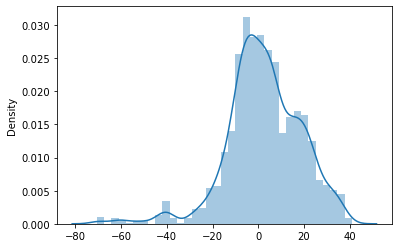

In [53]:
import seaborn as sns
sns.distplot(y_test-prediction)

In [54]:
from sklearn import metrics
import numpy as np
print('MAE :', metrics.mean_absolute_error(y_test, prediction))
print('MSE :', metrics.mean_squared_error(y_test, prediction))
print('MAE :', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE : 12.37796710697285
MSE : 270.5196189024025
MAE : 16.447480624776624


# Lasso Regression

In [55]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [57]:
lasso=Lasso()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40]}
lasso_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
lasso_regressor.fit(X_train,y_train)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=9.52833e-21): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.13033e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.225e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.14663e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.18261e-18): result may not be accurate.


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40]},
             scoring='neg_mean_squared_error')

In [58]:
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

{'alpha': 40}
-305.681678023204


In [59]:
prediction=lasso_regressor.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

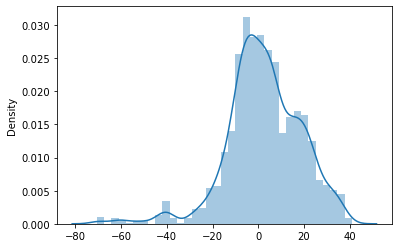

In [60]:
import seaborn as sns
sns.distplot(y_test-prediction)

In [61]:
from sklearn import metrics
import numpy as np
print('MAE :', metrics.mean_absolute_error(y_test, prediction))
print('MSE :', metrics.mean_squared_error(y_test, prediction))
print('MAE :', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE : 12.37796710697285
MSE : 270.5196189024025
MAE : 16.447480624776624
